In [1]:
import os
import sys
import json
import torch
import numpy as np
import pandas as pd

from torch.distributions import Poisson
from torch.distributions import Normal, MultivariateNormal
from torch.distributions import Bernoulli, Beta, Poisson
from deep_fields.models.random_fields.poisson_covariance import MertonBirthPoissonCovariance

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

%matplotlib inline

In [2]:
data_dir = "C:/Users/cesar/Desktop/Projects/General/deep_random_fields/data/raw/merton_birth_covariance/"
my_data_path = os.path.join(data_dir, "merton_birth_simulation_9.tr")
data_ = torch.load(my_data_path)
data_loader = data_["data_loader"]
model_param = data_["model_param"]

In [3]:
data_loader.keys()

dict_keys(['birth_numbers', 'assets_in_the_market', 'total_assets_in_history', 'log_returns', 'locations_history', 'kernel_sigma', 'kernel_lenght_scales', 'covariance_diffusion_history', 'expected_returns_history', 'kernel'])

In [54]:
birth_numbers = data_loader["birth_numbers"]
assets_in_the_market = data_loader["assets_in_the_market"]
log_returns = data_loader["log_returns"]

In [4]:
data_loader["covariance_diffusion_history"]

tensor([[0.9751, 0.8565, 0.7483,  ..., 0.5492, 0.6042, 0.6153],
        [0.8565, 0.9751, 0.9301,  ..., 0.8285, 0.4054, 0.5669],
        [0.7483, 0.9301, 0.9751,  ..., 0.8979, 0.3953, 0.6379],
        ...,
        [0.5492, 0.8285, 0.8979,  ..., 0.9751, 0.2125, 0.4277],
        [0.6042, 0.4054, 0.3953,  ..., 0.2125, 0.9751, 0.7938],
        [0.6153, 0.5669, 0.6379,  ..., 0.4277, 0.7938, 0.9751]],
       requires_grad=True)

In [55]:
#assets_in_the_market

In [56]:
#log_returns

In [57]:
process_data_frame = pd.DataFrame(log_returns.numpy())

<AxesSubplot:>

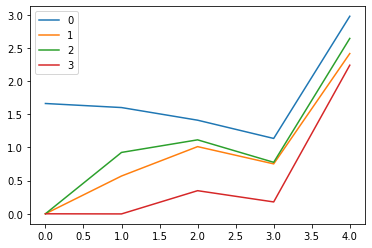

In [58]:
process_data_frame[[0,1,2,3]].plot()

In [59]:
results_dir = "C:/Users/cesar/Desktop/Projects/General/deep_random_fields/results/merton_birth_poisson_covariance/1653316307/"

In [60]:
os.listdir(results_dir)

['best_model.p',
 'inference_results.json',
 'parameters.json',
 'tensorboard_log']

In [61]:
# INFERENCE RESULTS
file = open(os.path.join(results_dir,"inference_results.json"),"r")
RESULTS = []
for line in file:
    result = json.loads(line)
    RESULTS.append(result)
    
monte_carlo_results = torch.load(os.path.join(results_dir,'best_model.p'))
parameters = json.loads(open(os.path.join(results_dir,"parameters.json"),"r").readline())

In [62]:
monte_carlo_results["K"][6]

array([0.7000135 , 0.48270616, 0.5884666 , 0.45996514, 0.5771563 ,
       0.25304013, 0.975077  , 0.58925974, 0.56688035], dtype=float32)

In [63]:
data_loader['covariance_diffusion_history'][6]

tensor([0.8845, 0.8648, 0.9043, 0.9257, 0.6267, 0.4705, 0.9751, 0.5627, 0.5857],
       grad_fn=<SelectBackward>)